In [88]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

In [89]:
raw_data = pd.read_csv("E:\\python\\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [90]:
raw_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [91]:
raw_data['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [92]:
raw_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [93]:
raw_data.isnull().sum() # Here do not have any missing or Null values in dataset.

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [94]:
raw_data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [95]:
#We have 9 columns where datatypei is object. so we will need to encode these columns to convert them into numeric datatypes.

<AxesSubplot:>

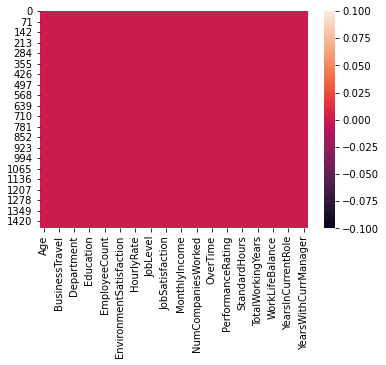

In [96]:
sns.heatmap(raw_data.isnull()) # heatmap also indicates that there are no null values in dataset.

In [97]:
from sklearn.preprocessing import LabelEncoder
cols = ['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']
le=LabelEncoder()
for i in cols:
    raw_data[i]=le.fit_transform(raw_data[i])

In [98]:
raw_data.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int32
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

In [99]:
raw_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [100]:
raw_data.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [101]:
raw_data.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

In [102]:
#Industry recomended values for skewness is between -3 and +3, we can see all values are within this range which shows that
#there is now skewness in data.

Age                            AxesSubplot(0.125,0.787927;0.133621x0.0920732)
Attrition                   AxesSubplot(0.285345,0.787927;0.133621x0.0920732)
BusinessTravel               AxesSubplot(0.44569,0.787927;0.133621x0.0920732)
DailyRate                   AxesSubplot(0.606034,0.787927;0.133621x0.0920732)
Department                  AxesSubplot(0.766379,0.787927;0.133621x0.0920732)
DistanceFromHome               AxesSubplot(0.125,0.677439;0.133621x0.0920732)
Education                   AxesSubplot(0.285345,0.677439;0.133621x0.0920732)
EducationField               AxesSubplot(0.44569,0.677439;0.133621x0.0920732)
EmployeeCount               AxesSubplot(0.606034,0.677439;0.133621x0.0920732)
EmployeeNumber              AxesSubplot(0.766379,0.677439;0.133621x0.0920732)
EnvironmentSatisfaction        AxesSubplot(0.125,0.566951;0.133621x0.0920732)
Gender                      AxesSubplot(0.285345,0.566951;0.133621x0.0920732)
HourlyRate                   AxesSubplot(0.44569,0.566951;0.1336

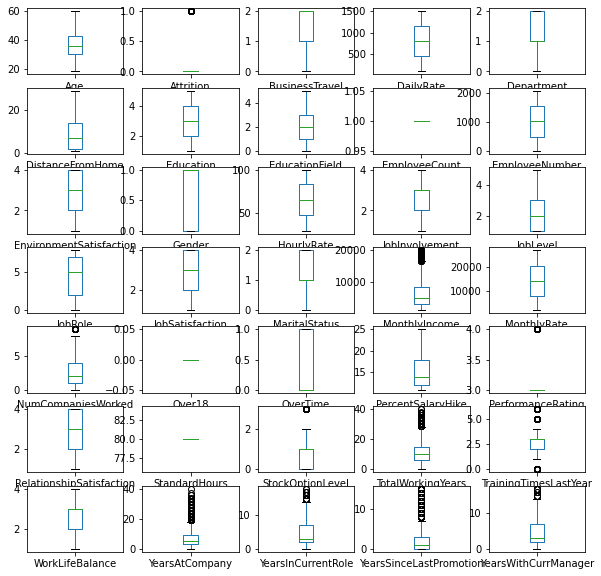

In [103]:
raw_data.plot(kind='box',subplots=True,layout=(7,5),figsize=(10,10))

<AxesSubplot:>

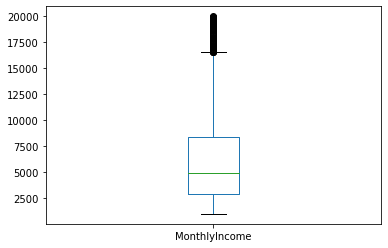

In [104]:
raw_data['MonthlyIncome'].plot(kind='box')

In [105]:
Q1=raw_data.quantile(0.25)
Q3=raw_data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Age                            13.00
Attrition                       0.00
BusinessTravel                  1.00
DailyRate                     692.00
Department                      1.00
DistanceFromHome               12.00
Education                       2.00
EducationField                  2.00
EmployeeCount                   0.00
EmployeeNumber               1064.50
EnvironmentSatisfaction         2.00
Gender                          1.00
HourlyRate                     35.75
JobInvolvement                  1.00
JobLevel                        2.00
JobRole                         5.00
JobSatisfaction                 2.00
MaritalStatus                   1.00
MonthlyIncome                5468.00
MonthlyRate                 12414.50
NumCompaniesWorked              3.00
Over18                          0.00
OverTime                        1.00
PercentSalaryHike               6.00
PerformanceRating               0.00
RelationshipSatisfaction        2.00
StandardHours                   0.00
S

In [106]:
print(raw_data < (Q1 - 1.5 * IQR)) or (raw_data> (Q3 + 1.5 * IQR))

        Age  Attrition  BusinessTravel  DailyRate  Department  \
0     False      False           False      False       False   
1     False      False           False      False       False   
2     False      False           False      False       False   
3     False      False           False      False       False   
4     False      False           False      False       False   
...     ...        ...             ...        ...         ...   
1465  False      False           False      False       False   
1466  False      False           False      False       False   
1467  False      False           False      False       False   
1468  False      False           False      False       False   
1469  False      False           False      False       False   

      DistanceFromHome  Education  EducationField  EmployeeCount  \
0                False      False           False          False   
1                False      False           False          False   
2              

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [107]:
from scipy.stats import zscore
z=np.abs(zscore(raw_data))
z

array([[0.4463504 , 2.28090588, 0.59004834, ..., 0.0632959 , 0.67914568,
        0.24583399],
       [1.32236521, 0.4384223 , 0.91319439, ..., 0.76499762, 0.36871529,
        0.80654148],
       [0.008343  , 2.28090588, 0.59004834, ..., 1.16768726, 0.67914568,
        1.15593471],
       ...,
       [1.08667552, 0.4384223 , 0.59004834, ..., 0.61549158, 0.67914568,
        0.31487349],
       [1.32236521, 0.4384223 , 0.91319439, ..., 0.48889978, 0.67914568,
        1.08689522],
       [0.32016256, 0.4384223 , 0.59004834, ..., 0.33939374, 0.36871529,
        0.59522723]])

In [108]:
threshold =3
print(np.where(z<3))
print(raw_data.shape)

(array([   0,    0,    0, ..., 1469, 1469, 1469], dtype=int64), array([ 0,  1,  2, ..., 32, 33, 34], dtype=int64))
(1470, 35)


In [109]:
data_new = raw_data[(z<3).all(axis = 1)]

In [110]:
data_new.shape

(0, 35)

In [111]:
#since all the data will be deleted if we use zscore method to remove outliers there will be no data in dataset.

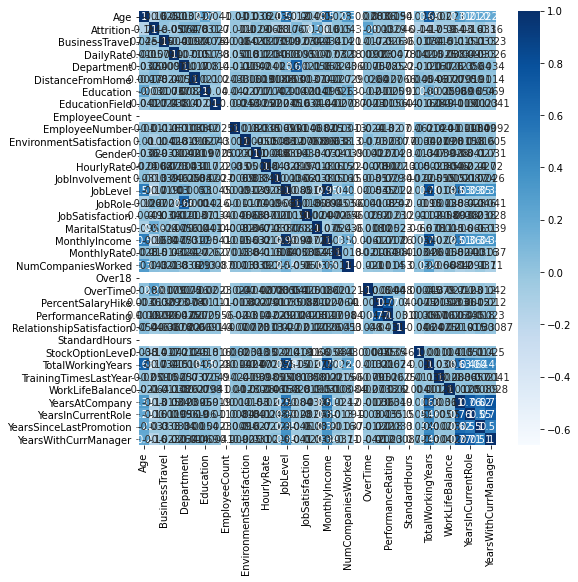

In [112]:
corr_hmap=raw_data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr_hmap,annot=True,cmap="Blues")
plt.show()

In [113]:
raw_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [114]:
y = raw_data['Attrition']
y.shape

(1470,)

In [115]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

In [116]:
x = raw_data.drop('Attrition',axis=1)
x.shape

(1470, 34)

In [117]:
x.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [118]:
best_rstate=0
best_acc_score=0
for i in range(1,500):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=i)
    lg=LogisticRegression()
    lg.fit(train_x,train_y)
    pred=lg.predict(test_x)
    temp_acc_score=accuracy_score(pred,test_y)
    if temp_acc_score > best_acc_score:
        best_acc_score = temp_acc_score
        best_rstate=i
        
print("Best_Accuracy score is:",best_acc_score, "\nBest random state value is:",best_rstate)

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=best_rstate)
#train_x.shape,test_x.shape,train_y.shape,test_y.shape
lg=LogisticRegression()
lg.fit(train_x,train_y)
predlg=lg.predict(test_x)

print("Random state used is:",best_rstate)
print("Accuracy score:",accuracy_score(predlg,test_y))
print("Confusion matrix:\n",confusion_matrix(test_y, predlg))
print("Classification report:\n",classification_report(test_y,predlg))

Best_Accuracy score is: 0.891156462585034 
Best random state value is: 438
Random state used is: 438
Accuracy score: 0.891156462585034
Confusion matrix:
 [[260   1]
 [ 31   2]]
Classification report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       261
           1       0.67      0.06      0.11        33

    accuracy                           0.89       294
   macro avg       0.78      0.53      0.53       294
weighted avg       0.87      0.89      0.85       294



In [119]:
#Here we use cross validation technique wuth Logistic regression to rotate entire dataset in train and test mode with 5 rounds 
cross_score=cross_val_score(lg,x,y,cv=5)
print("Cross validation score=", cross_score)
print("Cross validation mean score=", cross_score.mean())
print("Cross validation standard deviation score=", cross_score.std())

Cross validation score= [0.84013605 0.83673469 0.84693878 0.84013605 0.84013605]
Cross validation mean score= 0.8408163265306123
Cross validation standard deviation score= 0.0033326391058274567


In [120]:
best_rstate_gnb=0
best_acc_score_gnb=0
for j in range(1,500):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=j)
    gnb=GaussianNB()
    gnb.fit(train_x,train_y)
    pred=gnb.predict(test_x)
    temp_acc_score_gnb=accuracy_score(pred,test_y)
    if temp_acc_score_gnb > best_acc_score_gnb:
        best_acc_score_gnb = temp_acc_score_gnb
        best_rstate_gnb=j
        
print("Best_Accuracy score is:",best_acc_score_gnb, "\nBest random state value is:",best_rstate_gnb)

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=best_rstate_gnb)
#train_x.shape,test_x.shape,train_y.shape,test_y.shape
gnb=GaussianNB()
gnb.fit(train_x,train_y)
predgnb=gnb.predict(test_x)
print("Random state used is:",best_rstate_gnb)
print("Accuracy score:",accuracy_score(predgnb,test_y))
print("Confusion matrix:\n",confusion_matrix(test_y, predgnb))
print("Classification report:\n",classification_report(test_y,predgnb))

Best_Accuracy score is: 0.8741496598639455 
Best random state value is: 286
Random state used is: 286
Accuracy score: 0.8741496598639455
Confusion matrix:
 [[222  25]
 [ 12  35]]
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92       247
           1       0.58      0.74      0.65        47

    accuracy                           0.87       294
   macro avg       0.77      0.82      0.79       294
weighted avg       0.89      0.87      0.88       294



In [121]:
#Here we use cross validation technique to rotate entire dataset in train and test mode with 5 rounds 
cross_score_gnb=cross_val_score(gnb,x,y,cv=5)
print("Cross validation score=", cross_score_gnb)
print("Cross validation mean score=", cross_score_gnb.mean())
print("Cross validation standard deviation score=", cross_score_gnb.std())

Cross validation score= [0.84013605 0.78231293 0.7585034  0.78231293 0.82312925]
Cross validation mean score= 0.7972789115646259
Cross validation standard deviation score= 0.029854569057811857


In [122]:
# now we are storing output in file in local
output_data_lg=pd.DataFrame(predgnb)
output_data_lg.to_csv("E:\\python\\HRanalytics_prediction.csv",header=0)

In [123]:
import joblib
joblib.dump(gnb,'E:\\python\\HRanalytics_prediction.obj')

['E:\\python\\HRanalytics_prediction.obj']